In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import glob
from collections import deque


# MPI Ring Communication

This notebook shows the scaling costs of message passing with rising amount of tasks. It also shows the dependence of the interconnection speed of the nodes.
For that an MPI Ring Communication has been implemened in **src/main.c**

For an average Message Time the time for one **Roundtrip** has been measured with **MPI_Wtime()** function.

We did around 200000 Iterations to show the average Message Times with enough accurary.



In [128]:
#list all csv files only
csv_files = glob.glob('*.{}'.format('out'))
csv_files

['bench_34cores_run_.out',
 'bench_36cores_run_.out',
 'bench_10cores_run_.out',
 'bench_12cores_run_.out',
 'bench_14cores_run_.out',
 'bench_16cores_run_.out',
 'bench_18cores_run_.out',
 'bench_20cores_run_.out',
 'bench_22cores_run_.out',
 'bench_24cores_run_.out',
 'bench_26cores_run_.out',
 'bench_28cores_run_.out',
 'bench_2cores_run_.out',
 'bench_30cores_run_.out',
 'bench_32cores_run_.out',
 'bench_4cores_run_.out',
 'bench_6cores_run_.out',
 'bench_8cores_run_.out']

In [129]:
#append all files together
df = pd.concat([pd.read_csv(f,delimiter=';') for f in csv_files ], ignore_index=True)
df
new_df = df.sort_values(by="Tasks").set_index("Tasks")
new_df


,Zeit 0.000000,Runtime,Average Message Roundtrip Time,Average Message Send Time
Tasks,,,,
2,Zeit: 0.398978,0.392465,0.000002,0.000001
4,Zeit: 0.546277,0.538137,0.000003,0.000001
6,Zeit: 0.691929,0.657706,0.000003,0.000001
8,Zeit: 0.809874,0.795986,0.000004,0.000000
10,Zeit: 0.882235,0.867756,0.000004,0.000000
12,Zeit: 1.206851,1.185227,0.000006,0.000000
14,Zeit: 20.414864,20.378695,0.000102,0.000007
16,Zeit: 20.528369,20.498525,0.000102,0.000006
18,Zeit: 22.937850,22.901989,0.000114,0.000006


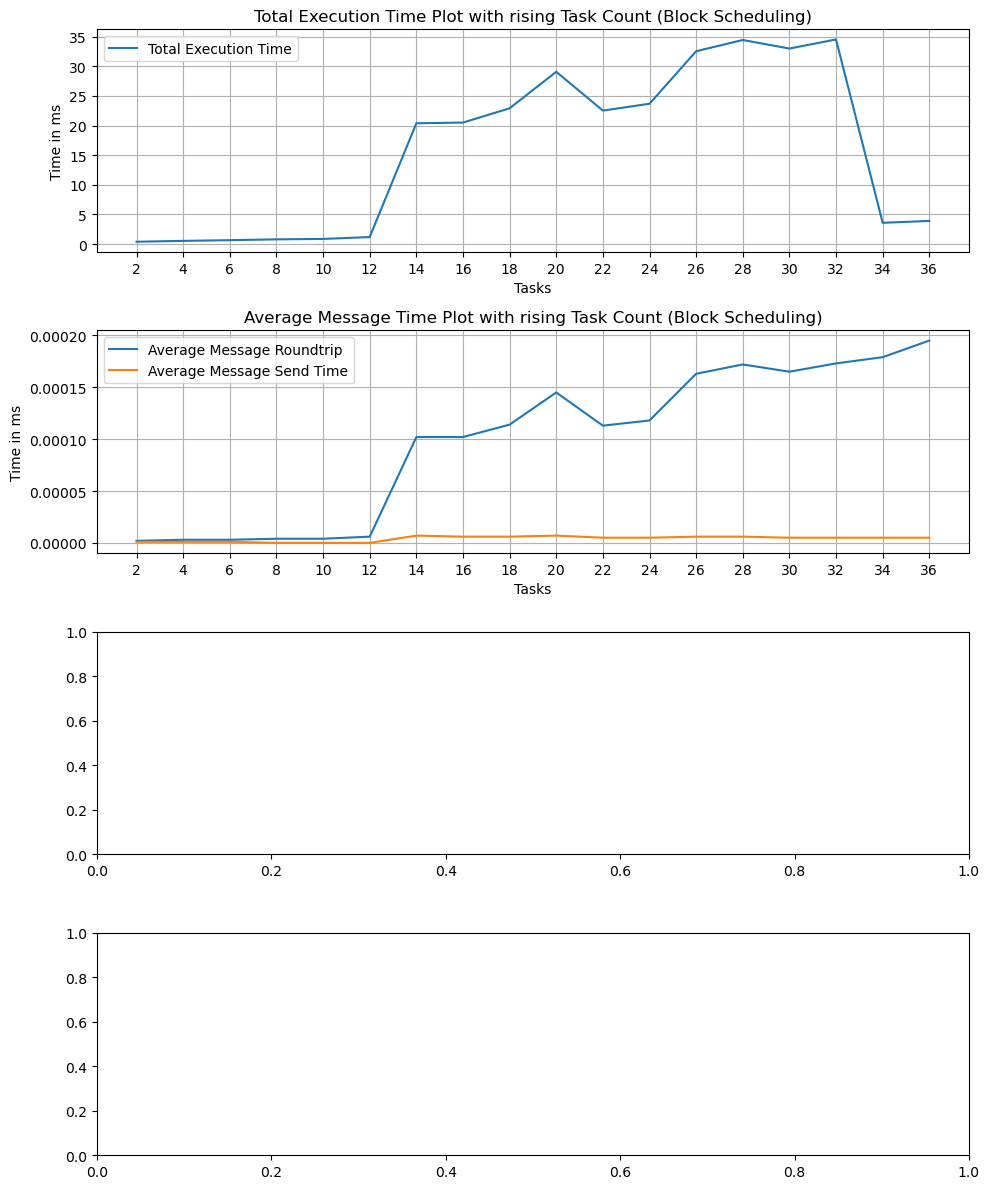

In [137]:

fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(10, 12))

ax1.plot(new_df.index, new_df["Runtime"], label="Total Execution Time")
ax2.plot(new_df.index,new_df["Average Message Roundtrip Time"], label="Average Message Roundtrip")
ax2.plot(new_df.index,new_df["Average Message Send Time"], label="Average Message Send Time")
ax1.set_xlabel("Tasks")
ax1.set_ylabel("Time in ms")
ax2.set_xlabel("Tasks")
ax2.set_ylabel("Time in ms")

ax1.set_title("Total Execution Time Plot with rising Task Count (Block Scheduling)")
ax2.set_title("Average Message Time Plot with rising Task Count (Block Scheduling)")

#ax1 =('MPI Ring Communication Message Time scale with rising Task Count')
ax1.legend()
ax2.legend()
# Set x-axis ticks with steps by size 2
#plt.xticks(df['Tasks'])
#ax2.xticks(df['Tasks'])
ax1.set_xticks(new_df.index[::])
ax2.set_xticks(new_df.index[::])
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()


plt.show()


# Results

Like shown in the plots there is a significant rise in the **Total Execution Time** and the **Average Time** at an Task amount above $12$.

That can be explained by the amound of nodes needed to use the tasks. Above an Task size of 12 (The Amount of Cores one single node can provide) the tasks have to be scheduled on different nodes. That increase the Costs for messaing a lot. The interconnection between the cores is a lot faster than the connection between the nodes.


# Optimizing


